# Classification of Faces

In this excercise, we try to classify images of : "Miranda_Cosgrove" "Chris_Martin" "Emma_Stone" "Jamie_Foxx" "Steve_Jobs" "Zac_Efron" "Sandra_Oh" "Taryn_Manning". The data is from a random sample of 8 persons of the OXFORD VGG Face dataset, more information here: http://www.robots.ox.ac.uk/~vgg/data/vgg_face/.

## Downloading of Data

You can download the data using the following code:

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from tensorflow.keras import activations

from tensorflow.keras import metrics

In [2]:
# Downloading the data, if it does not exist, this will take some time... (>120MB)
import urllib
import os
if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")
!ls -l 8_faces_train_and_valid.hdf5

Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [18]:
import h5py
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


<ipython-input-18-cb1dfbb9d158>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  X_train = h5f_X['X_train_8_faces'].value
<ipython-input-18-cb1dfbb9d158>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Y_train = h5f_X['Y_train_8_faces'].value
<ipython-input-18-cb1dfbb9d158>:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  X_valid = h5f_X['X_valid_8_faces'].value
<ipython-input-18-cb1dfbb9d158>:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Y_valid = h5f_X['Y_valid_8_faces'].value


250


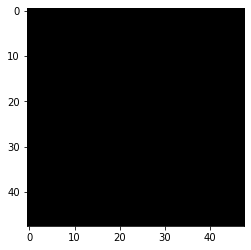

In [24]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 4 
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))


In [22]:
#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")
h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


<ipython-input-22-fa69679b5ec8>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  X_test = h5f_X['X_test_8_faces'].value
<ipython-input-22-fa69679b5ec8>:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Y_test = h5f_X['Y_test_8_faces'].value


In [23]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255



## a) Training an CNN from scratch

Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

* Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy. 
* Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
* Calculate the confusion matrix
* Have a look at missclassified examples

Image of the network:
https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [7]:
Y_trainF =[]
Y_validF =[]
Y_testF = []
for i in Y_train:
    arr = []
    for j in range(0,8):
        if i == j:
            arr.append(1)
        else:
            arr.append(0)
    Y_trainF.append(np.array(arr))
for i in Y_valid:
    arr = []
    for j in range(0,8):
        if i == j:
            arr.append(1)
        else:
            arr.append(0)
    Y_validF.append(np.array(arr))
    
for i in Y_test:
    arr = []
    for j in range(0,8):
        if i == j:
            arr.append(1)
        else:
            arr.append(0)
    Y_testF.append(np.array(arr))    
Y_trainF =np.array(Y_trainF)
Y_validF =np.array(Y_validF)
Y_testF =np.array(Y_testF)

In [8]:
model = Sequential()
model.add(Conv2D(15, kernel_size=(3, 3),activation='relu',input_shape=(48, 48, 3),padding="same"))
model.add(Activation(activations.relu))
model.add(Conv2D(15, kernel_size=(3, 3),activation='relu',input_shape=(48, 48, 15),padding="same"))
model.add(Activation(activations.relu))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30, kernel_size=(3, 3),activation='relu',input_shape=(24, 24, 15),padding="same"))
model.add(Activation(activations.relu))
model.add(Conv2D(30, kernel_size=(3, 3),activation='relu',input_shape=(24, 24, 30),padding="same"))
model.add(Activation(activations.relu))

model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Activation(activations.relu))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))



In [9]:
eta = 0.03                  # learning rate
wdecay = 0.1/X_train.shape[0]    # weight decay
sgd = SGD(lr=eta, decay=wdecay)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train,Y_trainF ,
          batch_size=16,
          epochs=10,
          verbose=1,
          validation_data=(X_valid, Y_validF))



Epoch 1/10
125/125 [==============================] - 9s 69ms/step - loss: 2.0745 - accuracy: 0.1325 - val_loss: 2.0153 - val_accuracy: 0.2400
Epoch 2/10
125/125 [==============================] - 8s 63ms/step - loss: 2.0046 - accuracy: 0.2156 - val_loss: 1.9007 - val_accuracy: 0.2900
Epoch 3/10
125/125 [==============================] - 8s 63ms/step - loss: 1.8896 - accuracy: 0.2706 - val_loss: 1.7835 - val_accuracy: 0.3550
Epoch 4/10
125/125 [==============================] - 8s 62ms/step - loss: 1.7892 - accuracy: 0.3414 - val_loss: 1.7119 - val_accuracy: 0.4025
Epoch 5/10
125/125 [==============================] - 8s 62ms/step - loss: 1.6882 - accuracy: 0.3880 - val_loss: 1.6380 - val_accuracy: 0.4125
Epoch 6/10
125/125 [==============================] - 8s 61ms/step - loss: 1.5994 - accuracy: 0.4074 - val_loss: 1.6222 - val_accuracy: 0.3925
Epoch 7/10
125/125 [==============================] - 8s 62ms/step - loss: 1.4769 - accuracy: 0.4641 - val_loss: 1.4743 - val_accuracy: 0.4575

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 15)        420       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 15)        2040      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 15)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 30)        4080      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 30)        0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


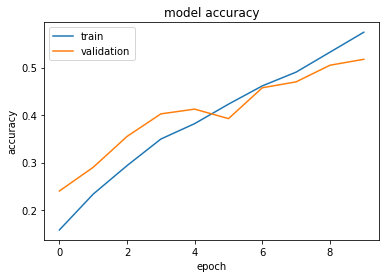

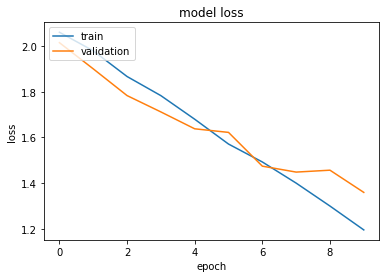

In [11]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
results = model.evaluate(X_test, Y_testF, batch_size=16)
print(results)

25/25 [==============================] - 0s 12ms/step - loss: 1.2797 - accuracy: 0.5425
[1.2796986103057861, 0.5425000190734863]


(400,)
tf.Tensor(
[[40  1  4  2  0  1  2  0]
 [ 1 17  7  8  5  4  2  6]
 [ 3  0 42  3  0  1  0  1]
 [ 5  3  6 32  0  3  0  1]
 [ 1  7  0  1 36  1  1  3]
 [ 9  5  8  6  0 20  1  1]
 [18  1  8  4  0  0 17  2]
 [ 6  4 20  3  0  3  1 13]], shape=(8, 8), dtype=int32)
[[6, 3, 1], [7, 1, 3], [10, 4, 1], [14, 1, 7], [16, 2, 5], [17, 0, 5], [18, 6, 7], [20, 5, 1], [21, 2, 6], [23, 3, 1]]


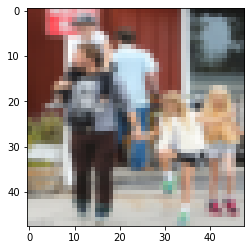

In [13]:
pred =[]
for arr in model.predict(X_test):
    pred.append(np.argmax(arr))
print(np.shape(pred))
matrix = tf.math.confusion_matrix(Y_test, pred)
cnt = 0
wrong_pic = []
for i in range(0,np.shape(pred)[0]):
    if Y_test[i] != pred[i] and cnt <10:
        cnt = cnt + 1
        pic = X_test[i]*255
        plt.imshow(np.asarray(pic,dtype="uint8"))
        wrong_pic.append([i,pred[i],Y_test[i]])
print(matrix)
print(wrong_pic)
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)

## b) Training using transfer learning
In transfer learning you use an existing trained model with given weights trained on a different task. You then add a few layers yourself and only train them. The model you add should look like:

```
my_dense1 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense2 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense3 (Dense)            (None, 100)               51300     
_________________________________________________________________
my_dense4 (Dense)            (None, 8)                 808       
```

Use the following code as a starting point:

In [14]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))

In [32]:
fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(512,activation='relu', name='my_dense1')(fc1)
fc1 = Dense(512,activation='relu', name='my_dense2')(fc1)
fc1 = Dense(100,activation='relu', name='my_dense3')(fc1)

fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
model_trans.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [27]:
#base_model.summary()
for layer in model_trans.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [33]:
eta = 0.03                  # learning rate
wdecay = 0.1/X_train.shape[0]    # weight decay
sgd = SGD(lr=eta, decay=wdecay)

model_trans.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model_trans.fit(X_train,Y_trainF ,
          batch_size=16,
          epochs=10,
          verbose=1,
          validation_data=(X_valid, Y_validF))



Epoch 1/10
125/125 [==============================] - 20s 153ms/step - loss: 1.9828 - accuracy: 0.2380 - val_loss: 1.6952 - val_accuracy: 0.3800
Epoch 2/10
125/125 [==============================] - 18s 148ms/step - loss: 1.6376 - accuracy: 0.3987 - val_loss: 1.5913 - val_accuracy: 0.4350
Epoch 3/10
125/125 [==============================] - 18s 147ms/step - loss: 1.4958 - accuracy: 0.4484 - val_loss: 1.5338 - val_accuracy: 0.4600
Epoch 4/10
125/125 [==============================] - 18s 147ms/step - loss: 1.3865 - accuracy: 0.4856 - val_loss: 1.4646 - val_accuracy: 0.4525
Epoch 5/10
125/125 [==============================] - 19s 149ms/step - loss: 1.3143 - accuracy: 0.5361 - val_loss: 1.3803 - val_accuracy: 0.5175
Epoch 6/10
125/125 [==============================] - 20s 157ms/step - loss: 1.2626 - accuracy: 0.5544 - val_loss: 1.4111 - val_accuracy: 0.5250
Epoch 7/10
125/125 [==============================] - 20s 162ms/step - loss: 1.1713 - accuracy: 0.5735 - val_loss: 1.3523 - val_ac

Do the same analysis as in a) above. You should get an accuracy of approx 0.61

In [35]:
results = model_trans.evaluate(X_test, Y_testF, batch_size=16)
print(results)

25/25 [==============================] - 3s 123ms/step - loss: 1.1965 - accuracy: 0.5375
[1.1965011358261108, 0.5375000238418579]


## c) Try to get better.

Ideas: use dropout and other tricks to prevent overfitting. Try to learn some convulutional layers as well.

In [39]:
fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(512,activation='relu', name='my_dense1')(fc1)
fc1 = Dropout(0.5)(fc1)
fc1 = Dense(512,activation='relu', name='my_dense2')(fc1)
fc1 = Dropout(0.5)(fc1)
fc1 = Dense(100,activation='relu', name='my_dense3')(fc1)
fc1 = Dropout(0.5)(fc1)
fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
model_trans.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [43]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fc1 = base_model.output
fc1 = Flatten()(fc1)
fc1 = Dense(512,activation='relu', name='my_dense1')(fc1)

fc1 = Dense(512,activation='relu', name='my_dense2')(fc1)

fc1 = Dense(100,activation='relu', name='my_dense3')(fc1)

fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
model_trans.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [44]:
eta = 0.03                  # learning rate
wdecay = 0.1/X_train.shape[0]    # weight decay
sgd = SGD(lr=eta, decay=wdecay)

model_trans.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model_trans.fit(X_train,Y_trainF ,
          batch_size=16,
          epochs=10,
          verbose=1,
          validation_data=(X_valid, Y_validF), callbacks=[es_callback])

Epoch 1/10
125/125 [==============================] - 20s 153ms/step - loss: 1.9937 - accuracy: 0.2154 - val_loss: 1.7100 - val_accuracy: 0.3675
Epoch 2/10
125/125 [==============================] - 19s 152ms/step - loss: 1.6725 - accuracy: 0.3995 - val_loss: 1.5985 - val_accuracy: 0.4100
Epoch 3/10
125/125 [==============================] - 19s 153ms/step - loss: 1.4867 - accuracy: 0.4740 - val_loss: 1.5001 - val_accuracy: 0.4450
Epoch 4/10
125/125 [==============================] - 19s 153ms/step - loss: 1.3687 - accuracy: 0.5052 - val_loss: 1.6973 - val_accuracy: 0.3875
Epoch 5/10
125/125 [==============================] - 20s 157ms/step - loss: 1.2837 - accuracy: 0.5370 - val_loss: 1.3326 - val_accuracy: 0.5400
Epoch 6/10
125/125 [==============================] - 19s 151ms/step - loss: 1.2348 - accuracy: 0.5597 - val_loss: 1.3821 - val_accuracy: 0.5350
Epoch 7/10
125/125 [==============================] - 19s 149ms/step - loss: 1.1497 - accuracy: 0.5918 - val_loss: 1.5611 - val_ac

In [41]:
results = model_trans.evaluate(X_test, Y_testF, batch_size=16)
print(results)

25/25 [==============================] - 3s 123ms/step - loss: 1.5360 - accuracy: 0.4375
[1.5360249280929565, 0.4375]
